# Overview
The calculation of the position of the whole body centre of mass (CoM) is done in two steps. 

## Calculation of the segment coordinate system
First, the body is divided into segments (panel A, blue ovals), and for each segment we calculate the joint centres corresponding to the segment’s origin (panel A, red and yellow dots), the segment coordinate system (SCS) and the segment length l_s.  We use the conventional SCS recommended by the International Society of Biomechanics (Wu et al., 2002, 2005): when a person stands upright in the anatomical position, with the arms at the sides and the palms facing forwards, the X, Y and Z axes of each segment are oriented forwards, upwards and lateral to the right (panel B).

To calculate the joint centers and SCS, the reference method (Dumas et al., 2007a, 2007b, 2015) uses 37 anatomical markers (panel C, markers in red, orange and yellow). A simplified method was proposed (Tisserand et al., 2016) which requires only 13 markers (panel C, markers in red). The code is written in a modular fashion, such that when the complete set of markers is available for a segment, the reference method is applied to that segment. Otherwise, we use either the simplified method or an intermediate version using the markers in orange (panel C), described when applicable. In addition, a method is provided to calculate the pelvis and head SCS from alternative markers (panel C, markers in green). The marker names and definitions are in the table below.

## Regression equations
Then, the segment origin O_s, SCS (X_s, Y_s, Z_s) and length l_s are used to calculate the position of the segment’s CoM according to the following regression equation:

CoM_s=O_s+l_s 100 (x_s X_s+y_s Y_s+z_s Z_s)

Finally, the whole body CoM is calculated as the barycenter of the different segments, weighted by the fraction of the segments’ mass relative to the total body mass M_s/M_tot , according to the following regression equation:

CoM_tot=∑_s M_s/M_tot  CoM_s

The length percents x_s, y_s, z_s and mass fractions M_s/M_tot  are obtained according to the method of (Dumas et al., 2007a, 2007b, 2015). This method uses photogrammetry data of 31 males (mean age 27.5 years old, mean weight 77.3 kg, mean stature 1.77 m) (McConville et al., 1980) and 46 females (mean age 31.2 years old, mean weight 63.9 kg, mean stature 1.61 m) (Young et al., 1983). The values are summarised in (Dumas and Wojtusch, 2018), except for the values for the torso segment, which are taken from (Dumas et al., 2007a) Table 2.

When the length l_distal of a distal segment (head, hand or foot) cannot be estimated from the markers present, it is estimated from the length l_proximal of the segment proximal to it, according to (Tisserand et al., 2016):
l_distal= l_proximal (l_distal_ref)/(l_proximal_ref )
The reference lengths are taken from Dumas et al. (2007a) Table 2 for the torso, and from Dumas and Wojtusch (2018) for the other segments. 



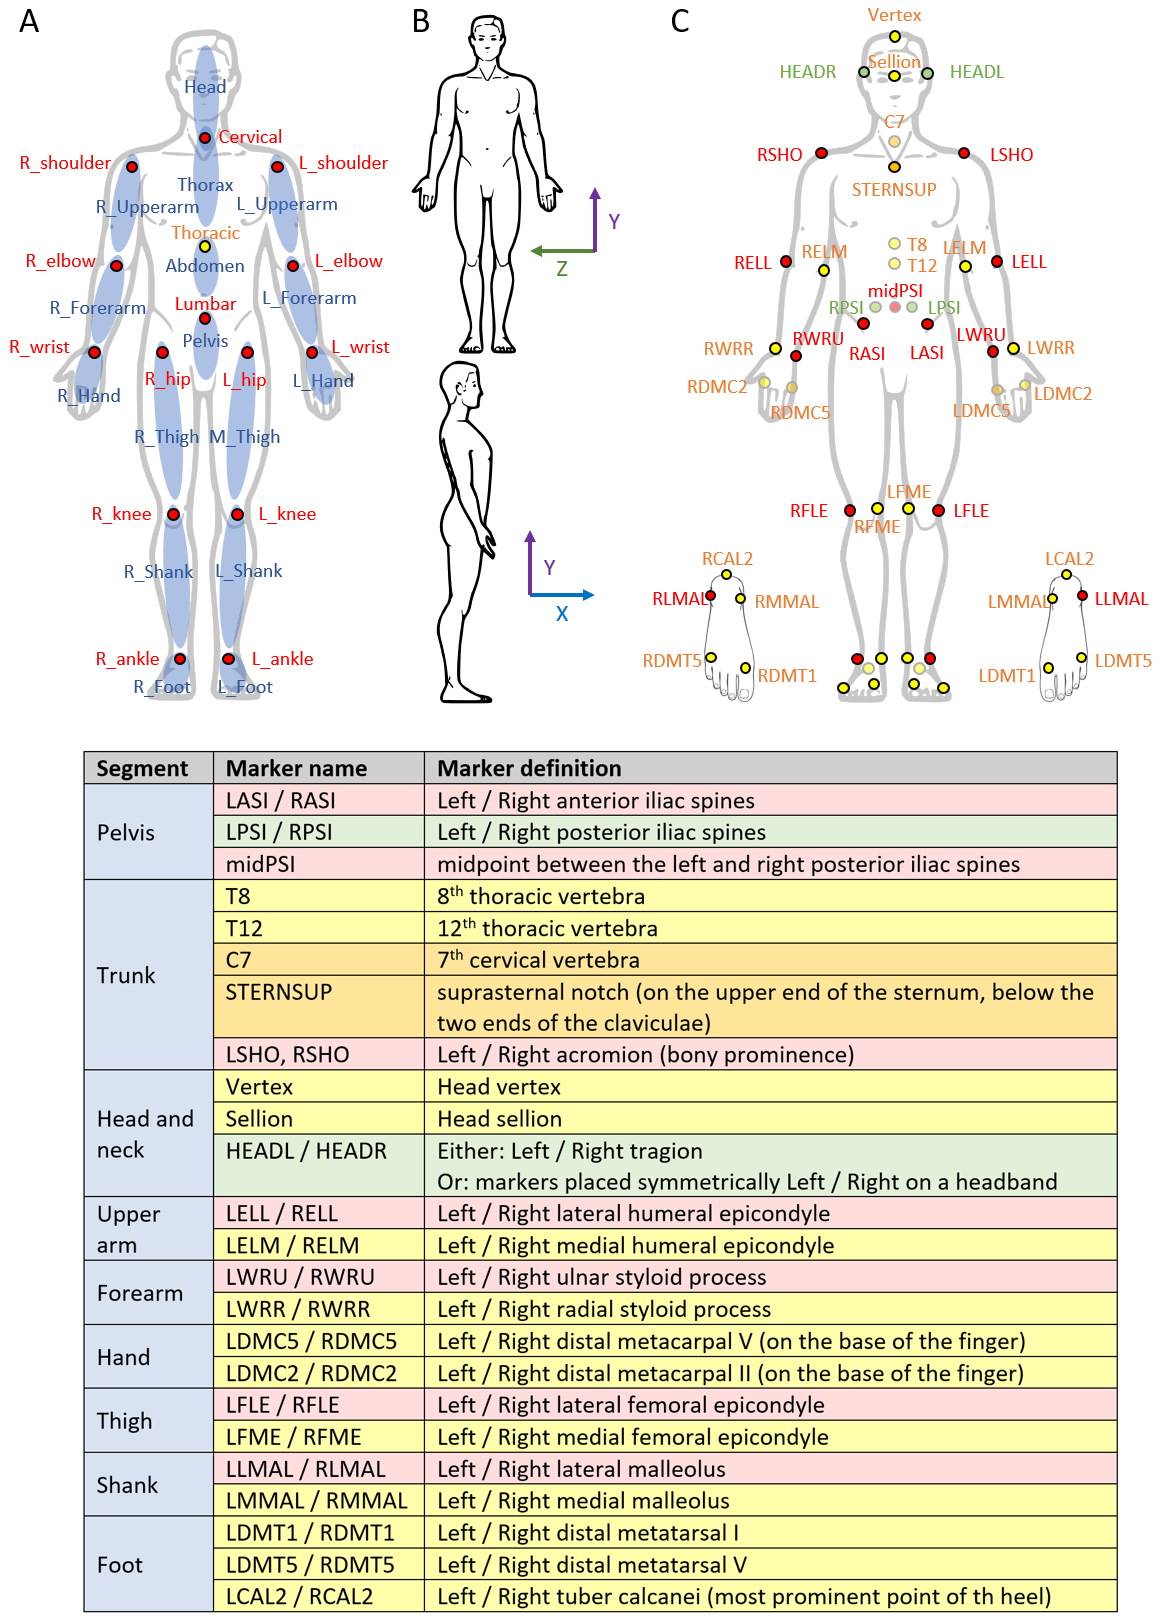

In [1]:
## Anthropometric values

# Segment mass (fraction of the total body mass M_s/M_tot)
Mass_fraction ={  'Head'    : {'female':0.067, 'male':0.067}, # Dumas and Wojtusch, 2018, Table 1
                  'Thorax'  : {'female':0.263, 'male':0.304}, # Dumas and Wojtusch, 2018, Table 2
                  'Abdomen' : {'female':0.041, 'male':0.029}, # Dumas and Wojtusch, 2018, Table 3
                  'Torso'   : {'female':0.304, 'male':0.333}, # Dumas et al., 2007a, Table 2
                  'Pelvis'  : {'female':0.147, 'male':0.142}, # Dumas and Wojtusch, 2018, Table 4
                  'UpperArm': {'female':0.023, 'male':0.024}, # Dumas and Wojtusch, 2018, Table 5
                  'Forearm' : {'female':0.014, 'male':0.017}, # Dumas and Wojtusch, 2018, Table 6
                  'Hand'    : {'female':0.005, 'male':0.006}, # Dumas and Wojtusch, 2018, Table 7
                  'Thigh'   : {'female':0.146, 'male':0.123}, # Dumas and Wojtusch, 2018, Table 8
                  'Shank'   : {'female':0.045, 'male':0.048}, # Dumas and Wojtusch, 2018, Table 9
                  'Foot'    : {'female':0.010, 'male':0.012}} # Dumas and Wojtusch, 2018, Table 10

# Segment CoM position (% segment length) in the following order: forwards (x_s), upwards (y_s), rightwards (z_s)
Length_percent = {'Head'    :{'female':[0.8,55.9,-0.1],  'male':[2.0,53.4,0.1]},   # Dumas and Wojtusch, 2018, Table 1
                  'Thorax'  :{'female':[1.5,-54.2,0.1],  'male':[0,-55.5,-0.4]},   # Dumas and Wojtusch, 2018, Table 2
                  'Abdomen' :{'female':[21.9,-41.0,0.3], 'male':[17.6,-36.1,-3.3]},# Dumas and Wojtusch, 2018, Table 3
                  'Torso'   :{'female':[-1.6,-43.6,-0.6],'male':[-3.6,-42.0,-0.2]},# Dumas et al. 2007a, Table 2
                  'Pelvis'  :{'female':[-7.2,-22.8,0.2], 'male':[-0.2,-28.2,-0.6]},# Dumas and Wojtusch, 2018, Table 4
                  'UpperArm':{'female':[-5.5,-50.0,-3.3],'male':[1.8,-48.2,-3.1]}, # Dumas and Wojtusch, 2018, Table 5 
                  'Forearm' :{'female':[2.1,-41.1,1.9],  'male':[-1.3,-41.7,1.1]}, # Dumas and Wojtusch, 2018, Table 6
                  'Hand'    :{'female':[7.7,-76.8,4.8],  'male':[8.2,-83.9,7.5]},  # Dumas and Wojtusch, 2018, Table 7
                  'Thigh'   :{'female':[-7.7,-37.7,0.8], 'male':[-4.1,-42.9,3.3]}, # Dumas and Wojtusch, 2018, Table 8
                  'Shank'   :{'female':[-4.9,-40.4,3.1], 'male':[-4.8,-41.0,0.7]}, # Dumas and Wojtusch, 2018, Table 9
                  'Foot'    :{'female':[38.2,-30.9,5.5], 'male':[50.2,-19.9,3.4]}} # Dumas and Wojtusch, 2018, Table 10

# Reference segment lengths (in mm)
Ref_length =    { 'Head'   : {'female':243, 'male':278}, # Dumas and Wojtusch, 2018, Table 1
                  'Thorax' : {'female':322, 'male':334}, # Dumas and Wojtusch, 2018, Table 2
                  'Torso'  : {'female':429, 'male':477}, # Dumas et al. 2007a, Table 2
                  'Forearm': {'female':247, 'male':283}, # Dumas and Wojtusch, 2018, Table 6
                  'Hand'   : {'female':71,  'male':80},  # Dumas and Wojtusch, 2018, Table 7
                  'Shank'  : {'female':388, 'male':433}, # Dumas and Wojtusch, 2018, Table 9
                  'Foot'   : {'female':117, 'male':139}} # Dumas and Wojtusch, 2018, Table 10


## Input data

The data necessary for the calculation are:

- Labels: the list of the marker names
- Position: a dictionary with, for each of the marker names in Labels, the timecourse of the 3D position (in mm) of that marker (numpy array of shape (3,NumberOfSamples)).
- sex: 'female' or 'male'

Two different data files (with different marker sets) are provided as examples.


In [22]:
# Data 1
sex = 'male'

import pickle
import gap_filling_linear

input_file     = '..\\data\\example_data.pkl'
sex            = 'male'
pickle_file    = open(input_file,'rb')
data           = pickle.load(pickle_file)
pickle_file.close()
Trajectories = data['Trajectories']
Position     = Trajectories['Position']
Labels       = Trajectories['Labels']
Visibility   = Trajectories['Visibility']
## Gaps in the data are filled through linear interpolation
for label in Labels:
    Position[label] = gap_filling_linear.gap_filling(Position[label], Visibility[label]) 
    
## Visualisation    
instant = 500 # timepoint that will be displayed for visualisation  
xlim = [1000,2800]
ylim = [-900,900]
zlim = [0,1800]

In [3]:
import numpy

# Function to normalise a vector
Normalise = lambda vector : vector/numpy.sqrt(numpy.sum(vector**2, axis = 0))

# Function which returns the median (over time) of the euclidian distance between two points
Distance = lambda point1, point2 : numpy.median(numpy.sqrt(numpy.sum((point1-point2)**2, axis = 0)))

# Function to project a vector onto a direction (which must be a normalised vector)
Projection = lambda vector, direction : direction*numpy.sum(vector*direction, axis = 0)


# Trunk and head segments

## Pelvis: hip and lumbar joint centers
The markers required for the calculation of the joint centers are: the left and right anterior iliac spines (LASI, RASI), and the midpoint between the left and right posterior iliac spines (midPSI).

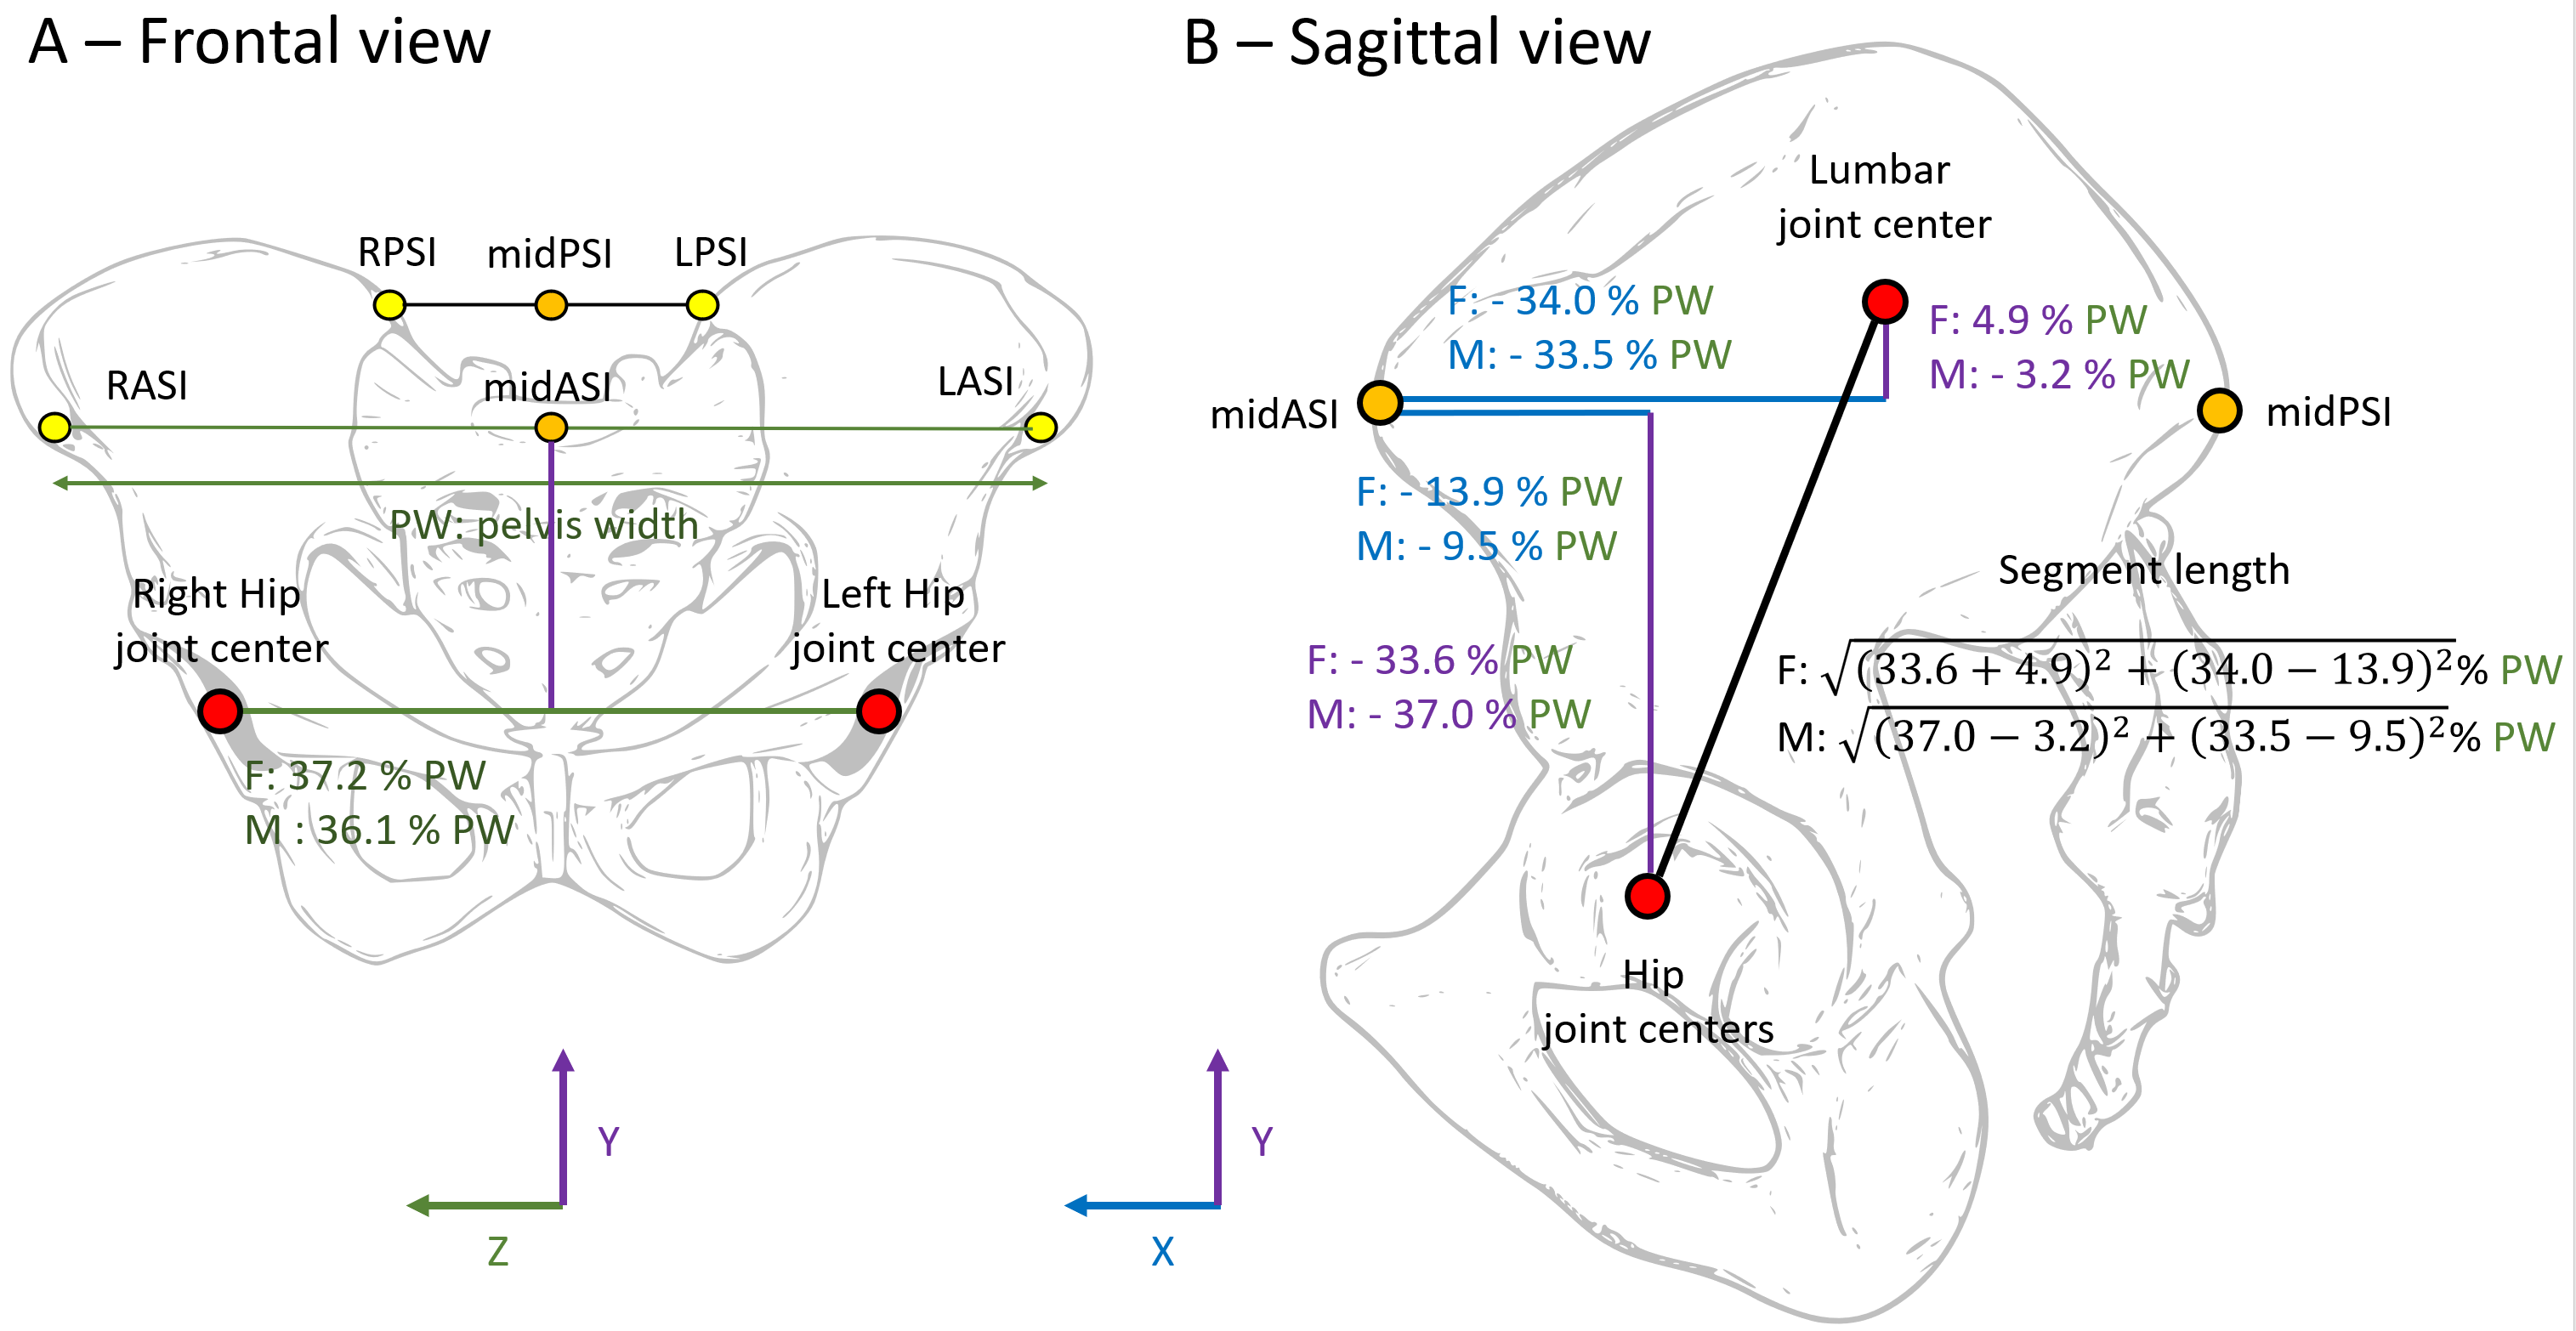

In [4]:
## Scaling relations for the hip and lumbar joint centers in the ISB pelvis coordinate system (from Dumas and Wojtusch 2018)
# distance to the midASI, as a fraction of pelvis width
# The scaling factors are provided in the following order: forwards, upwards, rightwards
Pelvis_scaling = {'Lumbar':{'female':[-0.34,0.049,0],       'male':[-0.335,-0.032,0]},
                  'R_hip': {'female':[-0.139,-0.336,0.372], 'male':[-0.095,-0.37,0.361]},
                  'L_hip': {'female':[-0.139,-0.336,-0.372],'male':[-0.095,-0.37,-0.361]}}

def Pelvis(Position, Labels, sex, Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin):
    # If the PSI is not directly available, it is calculated as the mid-point between LPSI and RPSI
    if 'PSI' not in Labels and 'LPSI' in Labels and 'RPSI' in Labels:
        midPSI = 0.5*(Position['LPSI']+Position['RPSI'])
    elif 'PSI' in Labels:
        midPSI = Position['PSI']
    else:
        print('posterior hip markers not available')
        
    if 'LASI' in Labels and 'RASI' in Labels:
        ## ISB pelvis coordinate system (Wu et al. 2002)
        # The Z direction is parallel to the line from LASI to RASI
        Z = Normalise(Position['RASI'] - Position['LASI'])
        # we calculate the mid-point between LASI and RASI
        midASI = 0.5*(Position['LASI']+Position['RASI'])
        # The Y direction is orthogonal to the plane containing LASI, RASI and midPSI, pointing upwards
        Y = Normalise(numpy.cross(Z, midASI - midPSI,axis = 0))
        # The X direction is orthogonal to the Y and Z directions, pointing forwards.
        X = Normalise(numpy.cross(Y,Z,axis = 0))

        # Pelvis width : median distance between LASI and RASI
        pelvis_width   = Distance(Position['LASI'],Position['RASI'])

        # The positions of the joint centers are provided relative to midASI, as a fraction of pelvis width
        Lumbar_JC = midASI+ pelvis_width*(X*Pelvis_scaling['Lumbar'][sex][0]+Y*Pelvis_scaling['Lumbar'][sex][1]+Z*Pelvis_scaling['Lumbar'][sex][2])
        R_Hip_JC  = midASI+ pelvis_width*(X*Pelvis_scaling['R_hip'][sex][0] +Y*Pelvis_scaling['R_hip'][sex][1] +Z*Pelvis_scaling['R_hip'][sex][2])
        L_Hip_JC  = midASI+ pelvis_width*(X*Pelvis_scaling['L_hip'][sex][0] +Y*Pelvis_scaling['L_hip'][sex][1] +Z*Pelvis_scaling['L_hip'][sex][2])

        Joint_centers['Lumbar']           = Lumbar_JC
        Joint_centers['R_hip']            = R_Hip_JC
        Joint_centers['L_hip']            = L_Hip_JC
        SegmentCoordinateSystem['Pelvis'] = (X, Y, Z)
        SegmentOrigin['Pelvis']           = Joint_centers['Lumbar']

        # Distance between the lumbar joint center and the projection of the hip joint center onto the sagittal plane
        Lumbar_to_hip = numpy.array(Pelvis_scaling['Lumbar'][sex])-numpy.array(Pelvis_scaling['R_hip'][sex])
        SegmentLength['Pelvis'] = pelvis_width*numpy.sqrt(Lumbar_to_hip[0]**2+Lumbar_to_hip[1]**2**2)
        return Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin
    
    else:
        print('anterior hip markers not available')

In [5]:
Joint_centers           = {}
SegmentCoordinateSystem = {}
SegmentLength           = {}
SegmentOrigin           = {}

Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin = Pelvis(Position, Labels, sex, Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin)

In [6]:
## Visualisation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
%matplotlib widget

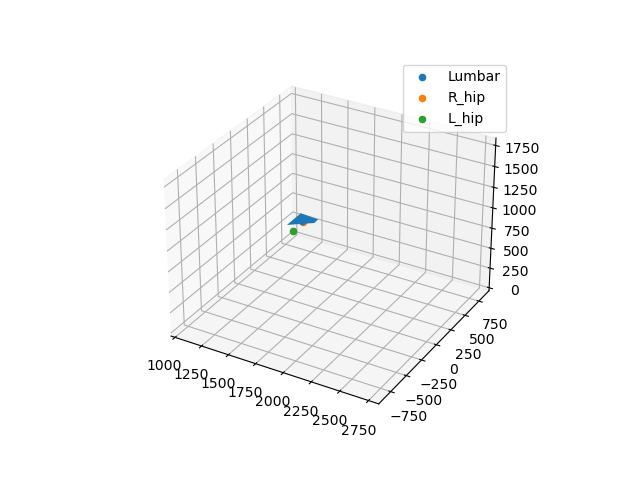

In [7]:
markers = ['LASI','RASI','RPSI','LPSI']
polygon = []
for marker in markers:
    position = Position[marker][:,instant]
    polygon.append([position[0],position[1],position[2]])
fig = plt.figure()
ax  = fig.add_subplot(111, projection="3d")
ax.add_collection(Poly3DCollection([polygon]))
for joint in ['Lumbar','R_hip','L_hip']:
    position = Joint_centers[joint][:,instant]
    ax.scatter(position[0],position[1],position[2], label = joint)
ax.legend()    
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_zlim(zlim)
plt.show()

## Trunk: thoracic, cervical and shoulder joint centers
Depending on the markers present, the trunk is either decomposed into two segments (thorax and abdomen) or considered as a single segment. The markers necessary for the calculation of the thoracic and joint center are: the 8th and 12th thoracic vertebra (T8 and T12), the 7th cervical vertebra (C7) and the suprasternal notch (STERNSUP). If T8 and T12 are not both present, the thoracic joint center  cannot be calculated, and the abdomen and thorax are merged into a single torso segment, as in Dumas et al. (2007). If C7 and STERNSUP are not both present, the cervical and shoulder joint centers are calculated according to a simplified method adpated from Tisserand et al. (2016).
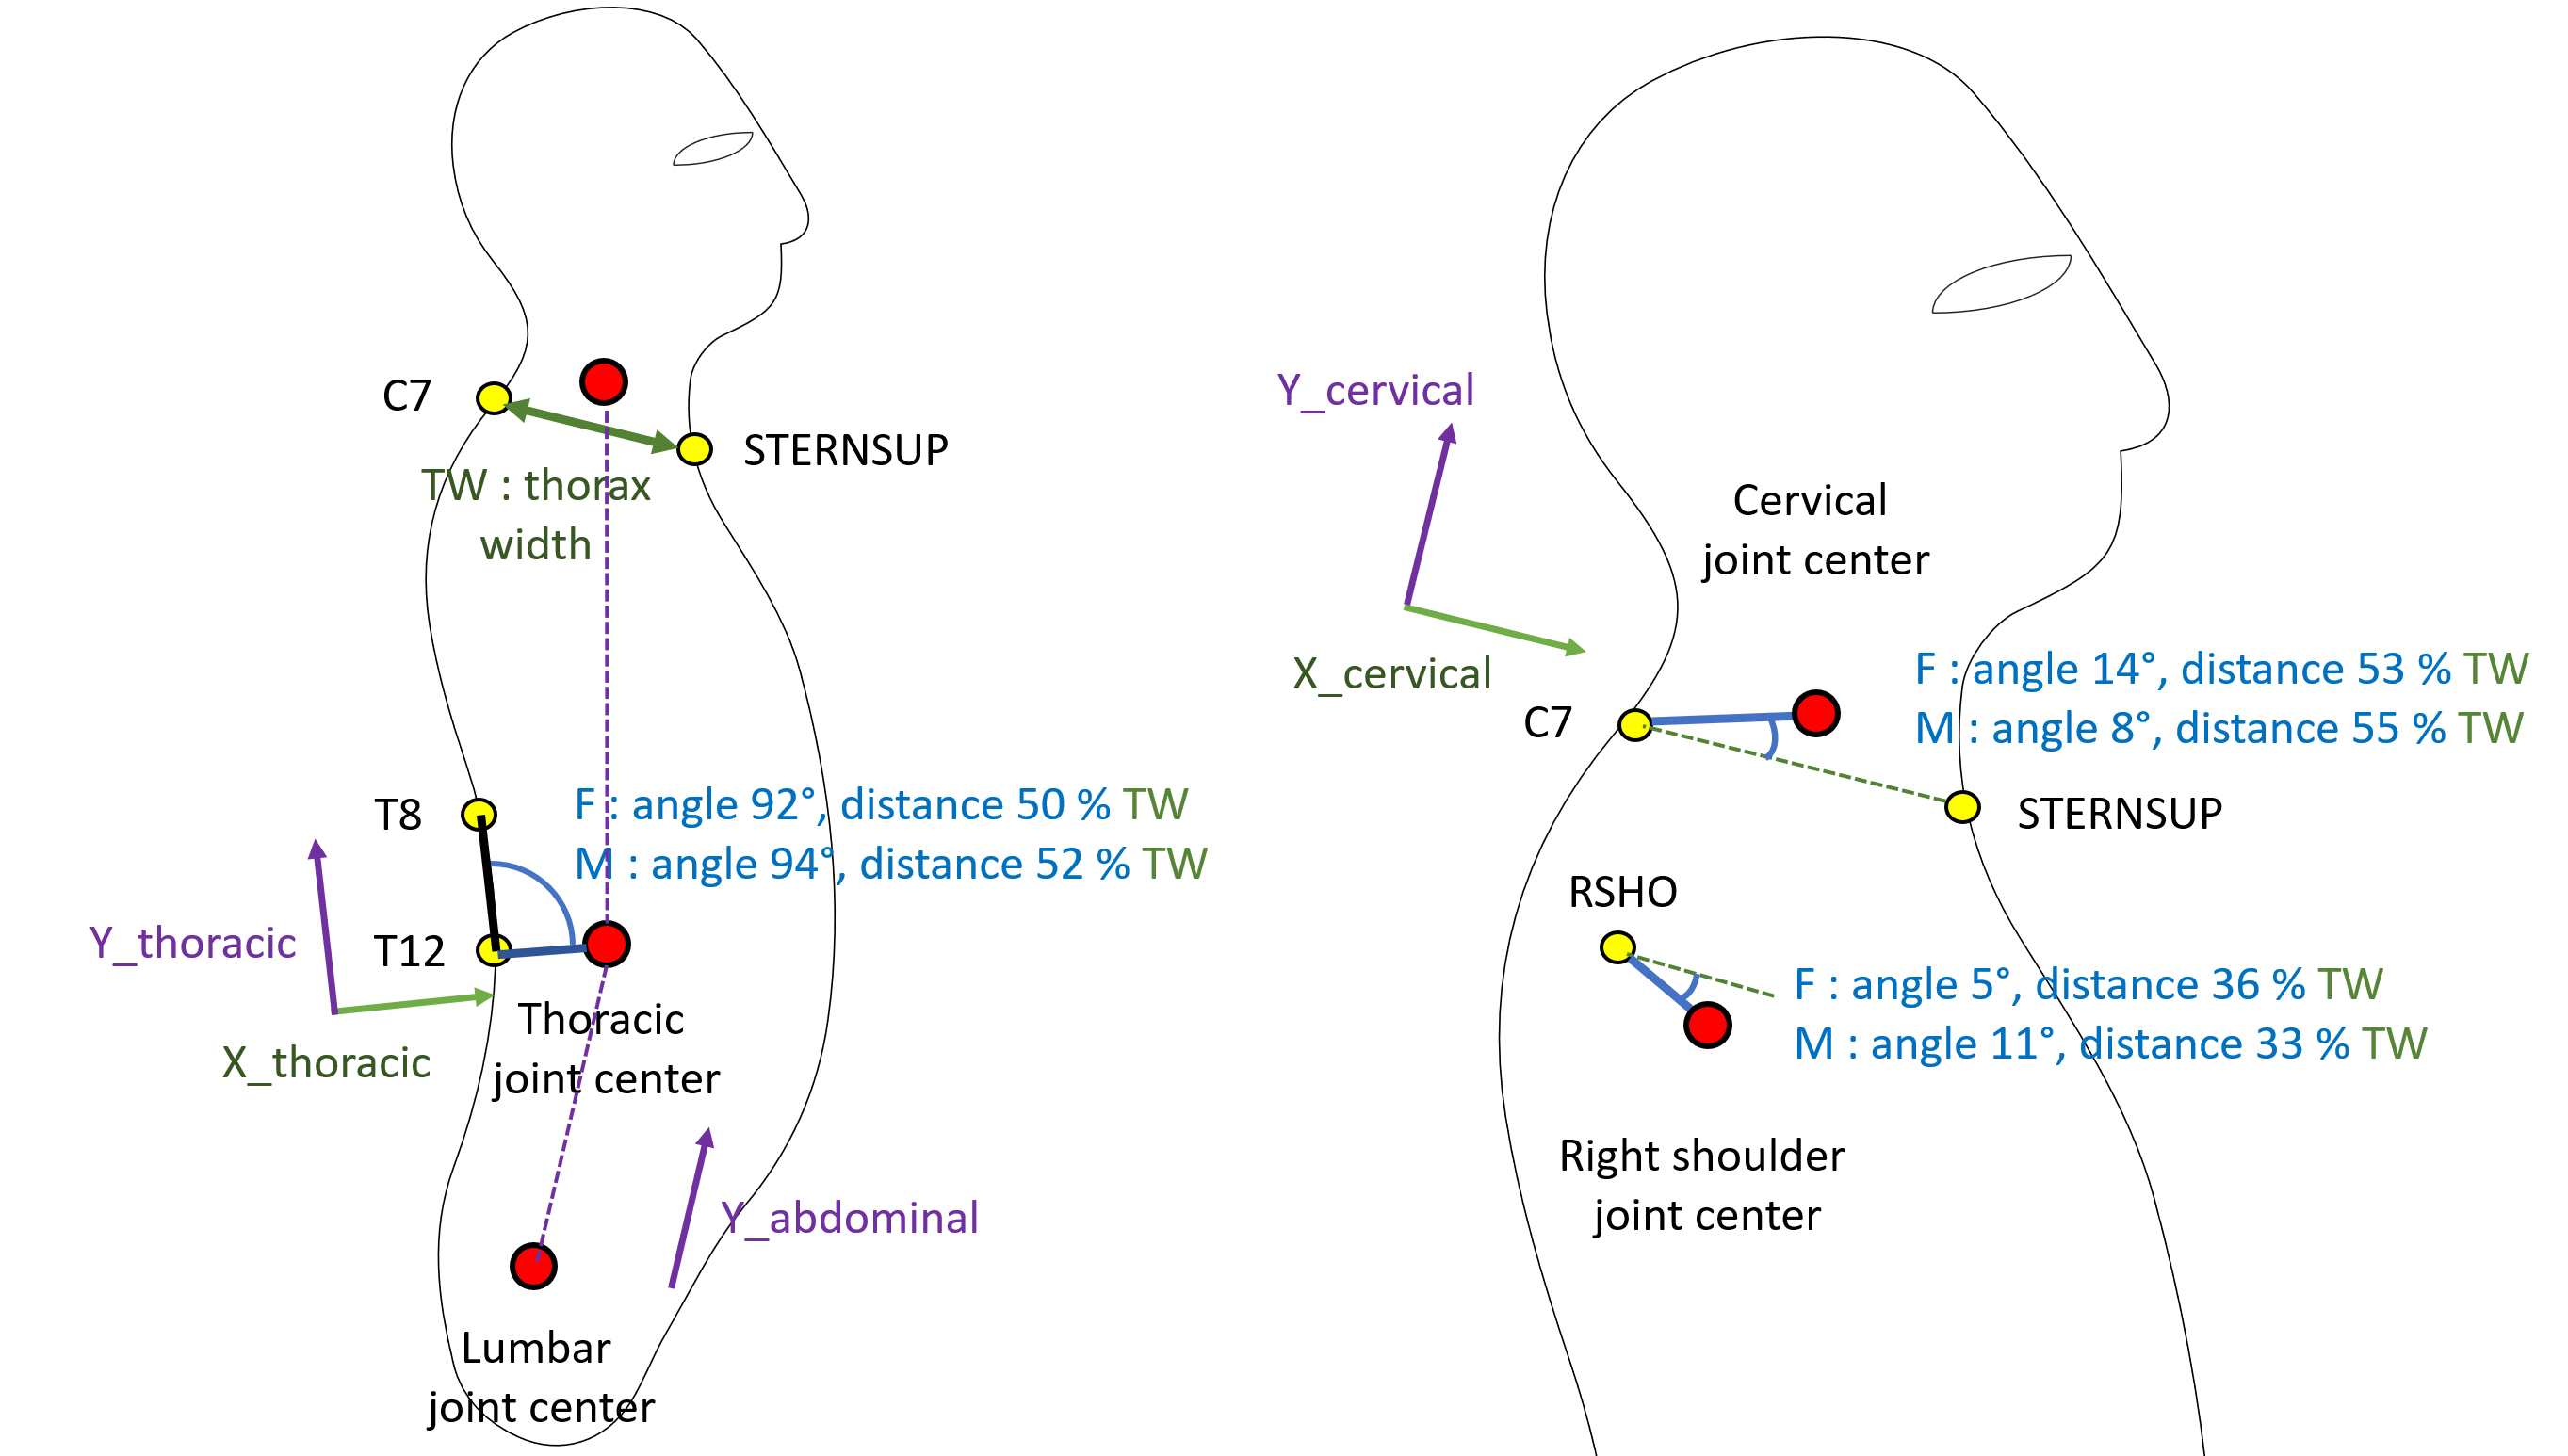

In [8]:
from numpy import pi, sin, cos
Trunk_angles =  {'Thorax'  : {'female': 92*pi/180, 'male':94*pi/180},
                 'Cervical': {'female': 14*pi/180, 'male':8*pi/180},
                 'Shoulder': {'female': -5*pi/180, 'male':-11*pi/180}} # in radian
Trunk_scaling = {'Thorax'  : {'female': 0.50, 'male':0.52},
                 'Cervical': {'female': 0.53, 'male':0.55},
                 'Shoulder': {'female': 0.36, 'male':0.33}}

def Trunk(Position, Labels, sex, Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin):
        
    if 'C7' in Labels and 'STERNSUP' in Labels:    
        # The positions of the joint centers are scaled by the thorax width
        thorax_width = Distance(Position['C7'],Position['STERNSUP'])
        
        # Reference method (Dumas et al. 2015)
        if ('T8' in Labels and 'T12' in Labels): 
            # The thorax sagittal plane contains C7, STERNSUP and T8: it is spanned by x_cervical and y_cervical
            x_cervical = Normalise(Position['STERNSUP']-Position['C7'])
            z_cervical = Normalise(numpy.cross(x_cervical,Position['C7']-Position['T8'], axis = 0)) # direction orthogonal to the thorax sagittal plane
            y_cervical = numpy.cross(z_cervical,x_cervical, axis = 0)
            
            # Projection of the T12-T8 segment onto the thorax sagittal plane
            T12_T8          = Position['T8']-Position['T12']
            T12_T8_sagittal = Projection(T12_T8,x_cervical) + Projection(T12_T8,y_cervical)
            y_thoracic      = Normalise(T12_T8_sagittal)
            x_thoracic      = numpy.cross(y_thoracic, z_cervical, axis = 0)
            
            angle = Trunk_angles['Thorax'][sex]
            Thorax_JC = Position['T12'] + thorax_width*Trunk_scaling['Thorax'][sex]*(sin(angle)*x_thoracic+cos(angle)*y_thoracic)
            Joint_centers['Thorax'] = Thorax_JC
            
        # The abdomen and thorax are merged into a single trunk segment, as in (Dumas et al., 2007).
        else: 
            # The trunk sagittal plane contains C7, STERNSUP and the lumbar joint center: it is spanned by x_cervical and y_cervical
            x_cervical = Normalise(Position['STERNSUP']-Position['C7'])
            z_cervical = Normalise(numpy.cross(x_cervical,Position['C7']-Joint_centers['Lumbar'], axis = 0)) # direction orthogonal to the thorax sagittal plane
            y_cervical = numpy.cross(z_cervical,x_cervical, axis = 0)
            
        # Cervical and shoulder joint centers 
        angle = Trunk_angles['Cervical'][sex]
        Joint_centers['Cervical'] = Position['C7'] + thorax_width*Trunk_scaling['Cervical'][sex]*(cos(angle)*x_cervical+sin(angle)*y_cervical)
        for side in ['L','R']:
            angle = Trunk_angles['Shoulder'][sex]
            Joint_centers[side+'_shoulder'] = Position[side+'SHO']+thorax_width*Trunk_scaling['Shoulder'][sex]*(cos(angle)*x_cervical+sin(angle)*y_cervical)
        
        ## Segment coordinate systems
        if ('T8' in Labels and 'T12' in Labels):
            # Thorax segment
            Y = Normalise(Joint_centers['Cervical']-Joint_centers['Thorax'])
            X = numpy.cross(Y,z_cervical, axis = 0)
            SegmentCoordinateSystem['Thorax'] = (X, Y, z_cervical)
            SegmentOrigin['Thorax'] = Joint_centers['Cervical']
            SegmentLength['Thorax'] = Distance(Joint_centers['Cervical'],Joint_centers['Thorax'])
                                       
            # Abdomen segment
            Y = Normalise(Joint_centers['Thorax']-Joint_centers['Lumbar'])
            x_mid = 0.5*SegmentCoordinateSystem['Thorax'][0]+SegmentCoordinateSystem['Pelvis'][0]
            Z = Normalise(numpy.cross(x_mid, Y, axis = 0))
            X = numpy.cross(Y, Z, axis = 0)
            SegmentCoordinateSystem['Abdomen'] = (X, Y, Z)
            SegmentOrigin['Abdomen'] = Joint_centers['Thorax']
            SegmentLength['Abdomen'] = Distance(Joint_centers['Thorax'],Joint_centers['Lumbar'])
        else:
            # Trunk segment
            Y = Normalise(Joint_centers['Cervical']-Joint_centers['Lumbar'])
            X = numpy.cross(Y,z_cervical, axis = 0)
            SegmentCoordinateSystem['Torso'] = (X, Y, z_cervical)
            SegmentOrigin['Torso'] = Joint_centers['Cervical']
            SegmentLength['Torso'] = Distance(Joint_centers['Cervical'],Joint_centers['Lumbar'])
                 

    ## Simplified method of Tisserand et al. 2016 with a single trunk segment
    else:
        # the shoulder joint centers correspond to the left and right acromions (LSHO and RSHO)
        for side in ['L','R']:
            Joint_centers[side+'_shoulder'] = Position[side+'SHO']
        if 'C7' in Labels:
            Joint_centers['Cervical'] = Position['C7']
        else:         
            # the cervical joint center is calculated as the midpoint between the LSHO and RSHO
            Joint_centers['Cervical'] = 0.5*(Position['LSHO']+Position['RSHO'])
                 
        # the longitudinal direction is from the lumbar to the cervical joint center
        Y = Normalise(Joint_centers['Cervical']-Joint_centers['Lumbar'])
        # the other directions cannot be calculated
        X = numpy.zeros(numpy.shape(Y))
        Z = numpy.zeros(numpy.shape(Y))
        SegmentCoordinateSystem['Torso'] = (X, Y, Z)
        SegmentOrigin['Torso']           = Joint_centers['Cervical']
        SegmentLength['Torso']           = Distance(Joint_centers['Cervical'],Joint_centers['Lumbar'])                 
    
    return Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin

In [9]:
## Visualisation
polygon1 = [Position['C7'][:,instant],Position['STERNSUP'][:,instant],Joint_centers['Lumbar'][:,instant]]
markers2 = ['LSHO','C7','RSHO']
polygon2 = []
for marker in markers2:
    position = Position[marker][:,instant]
    polygon2.append([position[0],position[1],position[2]])


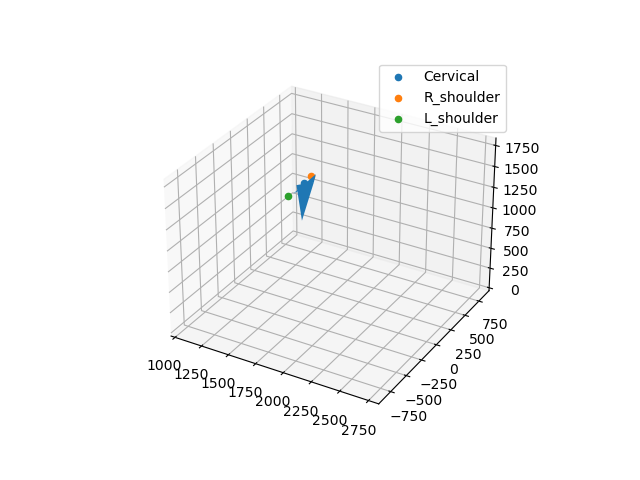

In [10]:
## Intermediate method
Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin = Trunk(Position, ['C7','STERNSUP'], sex, Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin)

fig = plt.figure()
ax  = fig.add_subplot(111, projection="3d")
ax.add_collection(Poly3DCollection([polygon1,polygon2]))
for joint in ['Cervical','R_shoulder','L_shoulder']:
    position = Joint_centers[joint][:,instant]
    ax.scatter(position[0],position[1],position[2], label = joint)
ax.legend()    
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_zlim(zlim)
plt.show()

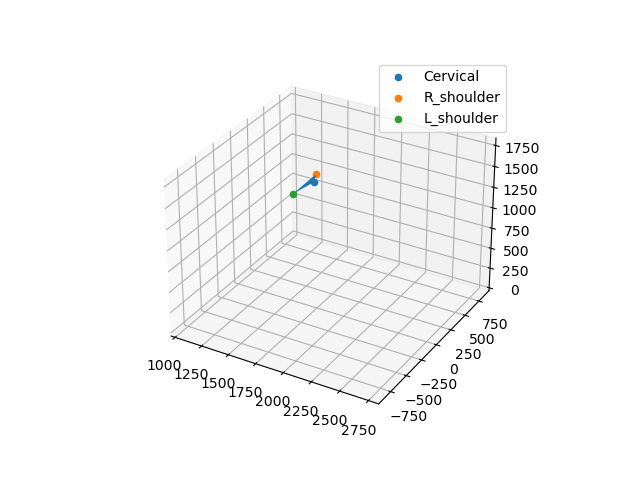

In [11]:
## Simplified method
Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin = Trunk(Position, ['C7'], sex, Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin)

polygon = []
for marker in ['C7','LSHO','RSHO']:
    position = Position[marker][:,instant]
    polygon.append([position[0],position[1],position[2]])
fig = plt.figure()
ax  = fig.add_subplot(111, projection="3d")
ax.add_collection(Poly3DCollection([polygon]))
for joint in ['Cervical','R_shoulder','L_shoulder']:
    position = Joint_centers[joint][:,instant]
    ax.scatter(position[0],position[1],position[2], label = joint)
ax.legend()    
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_zlim(zlim)
plt.show()




## Head
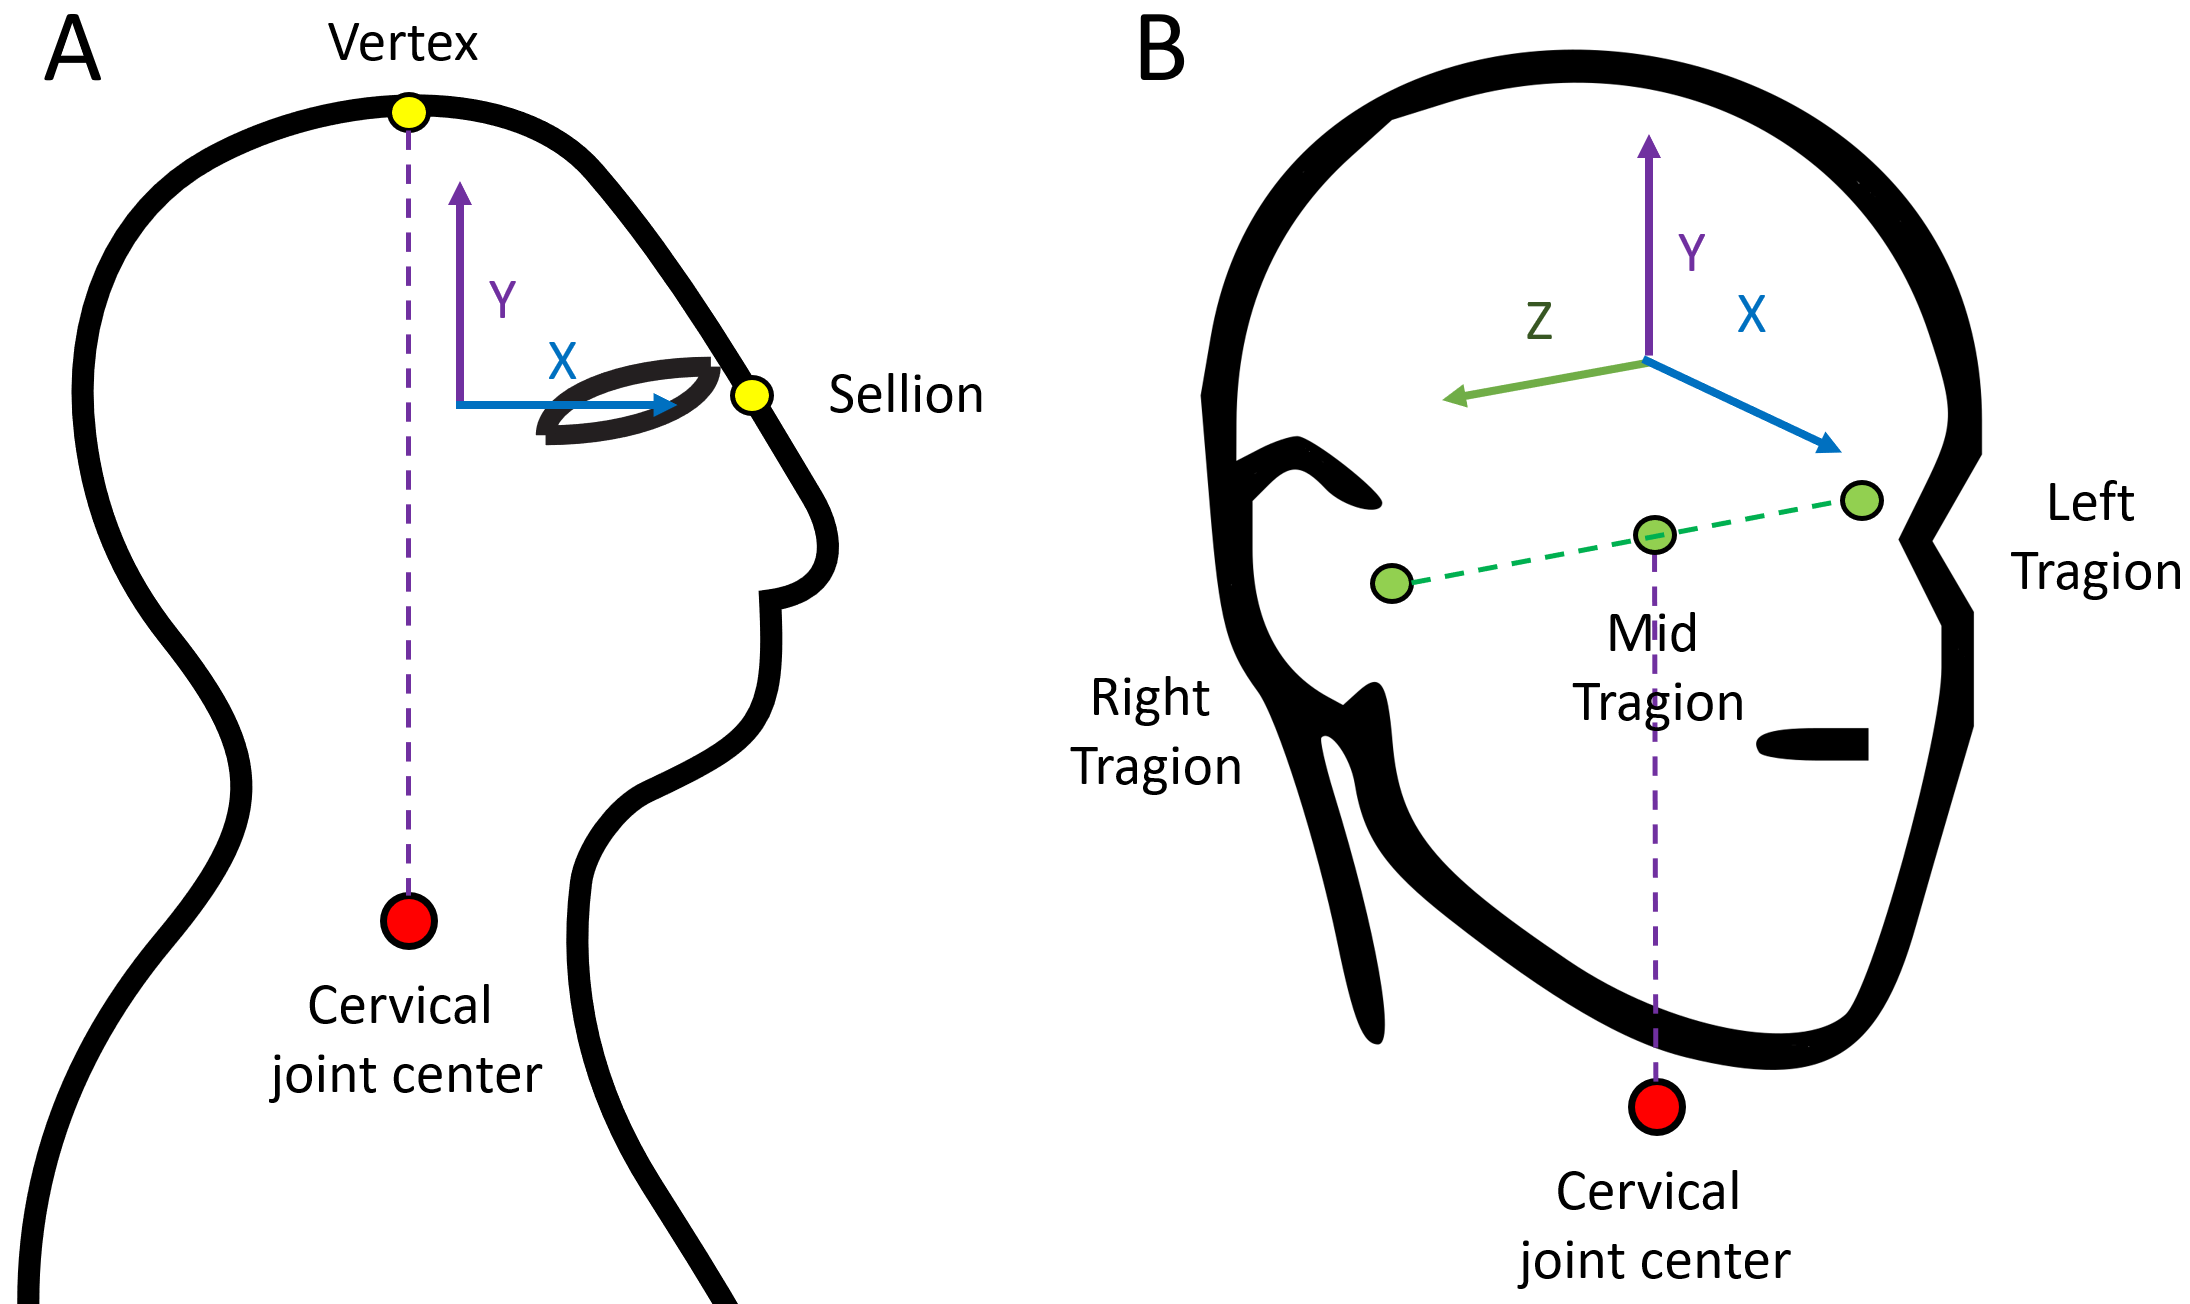

In [12]:
def Head(Position, Labels, sex, Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin):
    SegmentOrigin['Head'] = Joint_centers['Cervical']
    if ('Vertex' in Labels and 'Sellion' in Labels): # (Dumas and Wojtusch 2018)
        Y = Normalise(Position['Vertex']-Joint_centers['Cervical'])
        Z = Normalise(numpy.cross(Position['Sellion']-Joint_centers['Cervical'], Y, axis = 0))
        X = numpy.cross(Y,Z, axis = 0)
        SegmentLength['Head'] = Distance(Joint_centers['Cervical'], Position['Vertex'])
        SegmentCoordinateSystem['Head'] = (X,Y,Z)
    else:
        # The segment length is scaled with the Thorax length if present, with the Torso length otherwise
        if 'Thorax' in SegmentLength.keys():
            SegmentLength['Head'] = SegmentLength['Thorax']*Ref_length['Head'][sex]/Ref_length['Thorax'][sex]
        else:
            SegmentLength['Head'] = SegmentLength['Torso']*Ref_length['Head'][sex]/Ref_length['Torso'][sex]
        
        # If two markers are placed symetrically either on the left and right tragion, or on a headband
        if ('HEADL' in Labels and 'HEADR' in Labels): 
            midHead = 0.5*(Position['HEADL']+Position['HEADR'])
            Y = Normalise(midHead-Joint_centers['Cervical'])
            X = Normalise(numpy.cross(Y, Position['HEADR']-Position['HEADL'], axis = 0))
            Z = numpy.cross(X,Y, axis = 0)
            SegmentCoordinateSystem['Head'] = (X,Y,Z)
        else: # If head markers are not present, then similarly to Tisserand et al. (2016)
            # the head SCS is assumed to match that of the Thorax (if available) or Torso (otherwise)
            if 'Thorax' in SegmentCoordinateSystem.keys():
                SegmentCoordinateSystem['Head'] = SegmentCoordinateSystem['Thorax']
            elif 'Torso' in SegmentCoordinateSystem.keys():
                SegmentCoordinateSystem['Head'] = SegmentCoordinateSystem['Torso']
    return Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin            

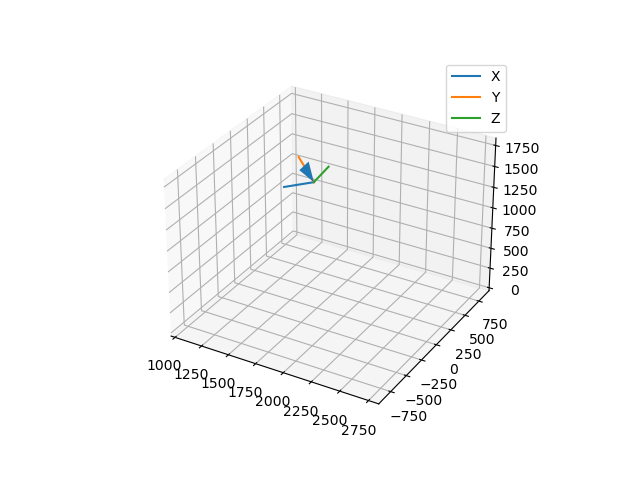

In [13]:
Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin = Head(Position, Labels, sex, Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin)

polygon = [Position['HEADL'][:,instant],Position['HEADR'][:,instant],Joint_centers['Cervical'][:,instant]]

fig = plt.figure()
ax  = fig.add_subplot(111, projection="3d")
ax.add_collection(Poly3DCollection([polygon]))
SCS    = SegmentCoordinateSystem['Head']
length = SegmentLength['Head']
origin = Joint_centers['Cervical'][:,instant]
labels = ['X','Y','Z']
for dim in range(3):
    endpoint = origin + length*SCS[dim][:,instant]
    ax.plot([origin[0],endpoint[0]],[origin[1],endpoint[1]],[origin[2],endpoint[2]], label = labels[dim]) 
ax.legend()    
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_zlim(zlim)
plt.show()

# Limbs

## Overview

The  coordinate systems of the limb segments are all calculated in a similar manner (except for the feet). The segment origin is the proximal joint center and the segment length is the distance from the proximal to the distal joint center.

### Reference method

The reference method uses the proximal joint center (TOP, panels A-C) and two distal markers placed medially and laterally of the distal joint center (RIGHT and LEFT, panels A-C). The distal joint center is placed at the mid-point between the two distal markers (RIGHT and LEFT). The Y axis is from the distal to the proximal joint center. The X axis is orthogonal to the plane containing the proximal joint center and the two distal markers, pointing forwards. The Z axis is orthogonal to X and Y, pointing rightwards.

For example, for the upper arm, the proximal joint is the shoulder joint center (TOP, panels B-C). For the right upper arm (panel B), the rightwards distal marker (RIGHT) is the right humeral lateral epicondyle (RELL) and the leftwards one is the right humeral medial epicondyle (RELM). For the left upper arm, the lateral and medial distal markers are flipped (panel C): RIGHT corresponds to the left humeral lateral epicondyle (LELM) and the LEFT to the left humeral medial epicondyle (LELL). In this way, when the person stands in the reference anatomical posture, the Z-axis of all limb segments is oriented rightwards.

Note that for the feet (panel D), the calcaneus marker on the heel (LCAL2 and RCAL2) is taken as the TOP marker rather than the ankle joint (Dumas and Wojtusch 2018, Table 10). The X axis (forwards) - rather than the Y axis (upwards) - is from the ankle to the toe joint.
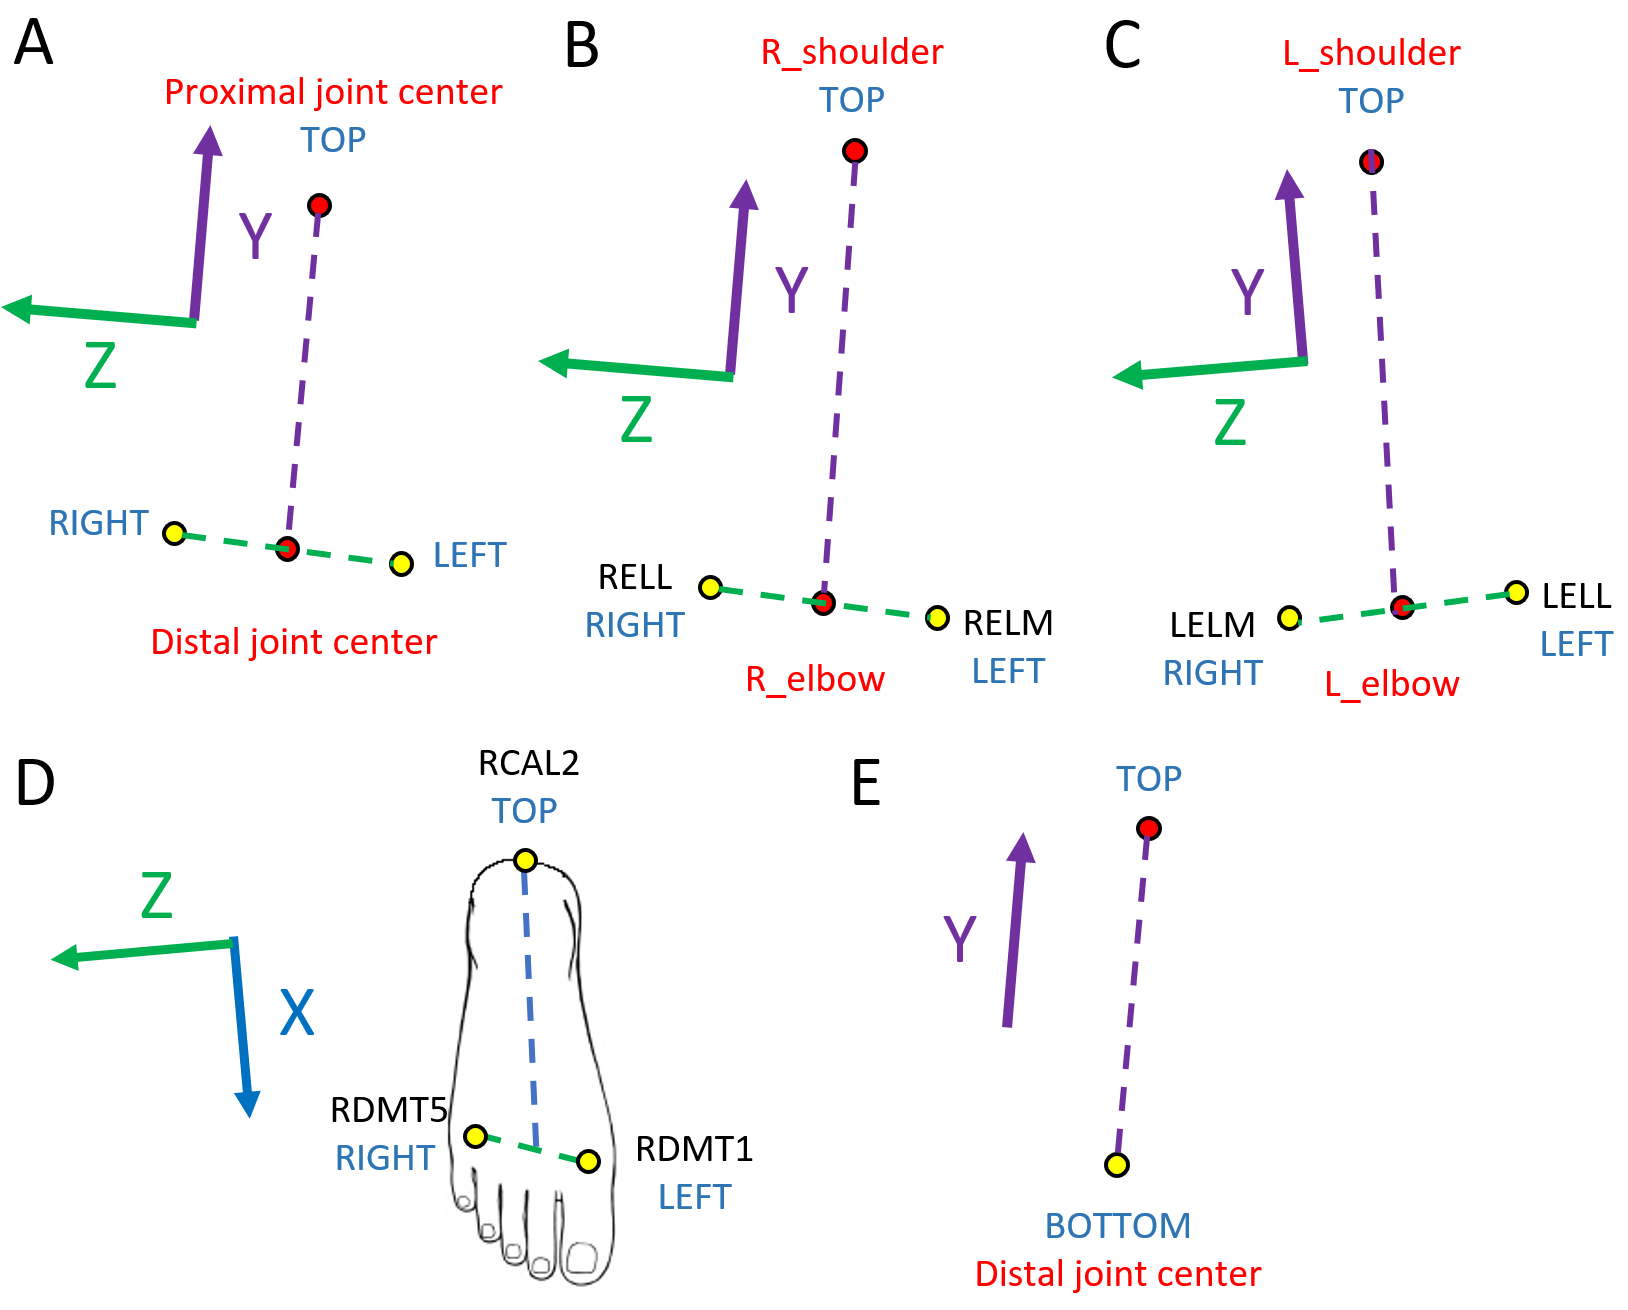

In [14]:
# Markers placed laterally and medially of the distal joint
LateralMedialMarkers = {
'Elbow': ('ELL','ELM'), # humeral lateral epicondyle, humeral medial epicondyle
'Wrist': ('WRR','WRU'), # radial styloid process, ulnar styloid process
'Finger': ('DMC2','DMC5'), # distal metacarpal II, distal metacarpal V
'Knee': ('FLE','FME'), # femoral lateral epicondyle, femoral medial epicondyle
'Ankle': ('LMAL','MMAL'), # lateral malleolus, medial malleolus
'Toe': ('DMT5','DMT1') # distal metatarsal V, distal metatarsal I
}

# For the limbs on the left side of the body, lateral markers are leftwards of the joint and medial markers are rightwards
# For the limbs on the right side of the body, lateral markers are rightwards of the joint and medial markers are leftwards
def LeftwardRightward(joint,side):
    if side == 'L':
        return side+LateralMedialMarkers[joint][0], side+LateralMedialMarkers[joint][1]
    elif side == 'R':
        return side+LateralMedialMarkers[joint][1], side+LateralMedialMarkers[joint][0]
    
def LimbSegment(Top,Leftward,Rightward):
    JointCenter = 0.5*(Leftward+Rightward)
    length      = Distance(Top, JointCenter)
    Y = Normalise(Top - JointCenter)
    X = Normalise(numpy.cross(Y,Rightward-Leftward, axis = 0))
    Z = numpy.cross(X,Y, axis = 0)
    return JointCenter, length, (X,Y,Z)

### Simplified methods
If a single distal marker is available (panel E, BOTTOM), we apply a simplified method (Tisserand et al. 2016): the distal joint center is assumed to be at the BOTTOM marker. Only the Y-axis is available, from the distal to the proximal joint center.

For the hands (respectively feet), if no distal marker is present, the segment coordinate system is assumed to match that of the forearm (respectively shank), and the segment length is scaled by the length of the proximal segment. 

In [15]:
# If a single distal marker is present, we use the simplified method of Tisserand et al., 2016
def LimbSegmentSimple(Top,Bottom):
    length = Distance(Top, Bottom)
    Y = Normalise(Top - Bottom)
    X = numpy.zeros(numpy.shape(Y))
    Z = numpy.zeros(numpy.shape(Y))
    return length, (X,Y,Z)

In [16]:
def Limbs(Position, Labels, sex, Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin):
    for side in ['L','R']:
        
        # Upper arm
        SegmentOrigin[side+'_UpperArm'] = Joint_centers[side+'_shoulder']
        Left, Right = LeftwardRightward('Elbow',side)
        if (Left in Labels and Right in Labels):
            Joint_centers[side+'_elbow'], SegmentLength[side+'_UpperArm'], SegmentCoordinateSystem[side+'_UpperArm'] = LimbSegment(Joint_centers[side+'_shoulder'],Position[Left],Position[Right])
        elif side+'ELL' in Labels: # Tisserand et al. 2016
            Joint_centers[side+'_elbow'] = Position[side+'ELL']
            SegmentLength[side+'_UpperArm'], SegmentCoordinateSystem[side+'_UpperArm'] = LimbSegmentSimple(Joint_centers[side+'_shoulder'],Joint_centers[side+'_elbow'])
        
        # Forearm
        SegmentOrigin[side+'_Forearm'] = Joint_centers[side+'_elbow']
        Left, Right = LeftwardRightward('Wrist',side)
        if (Left in Labels and Right in Labels):
            Joint_centers[side+'_wrist'], SegmentLength[side+'_Forearm'], SegmentCoordinateSystem[side+'_Forearm'] = LimbSegment(Joint_centers[side+'_elbow'],Position[Left],Position[Right])
        elif side+'WRU' in Labels: # Tisserand et al. 2016
            Joint_centers[side+'_wrist'] = Position[side+'WRU']
            SegmentLength[side+'_Forearm'], SegmentCoordinateSystem[side+'_Forearm'] = LimbSegmentSimple(Joint_centers[side+'_elbow'],Joint_centers[side+'_wrist'])
        
        # Hand
        SegmentOrigin[side+'_Hand'] = Joint_centers[side+'_wrist']
        Left, Right = LeftwardRightward('Finger',side)
        if (Left in Labels and Right in Labels):
            Finger_joint, SegmentLength[side+'_Hand'], SegmentCoordinateSystem[side+'_Hand'] = LimbSegment(Joint_centers[side+'_wrist'],Position[Left],Position[Right])
        elif side+'DMC5' in Labels: # adaptation of Tisserand et al., 2016
            Finger_joint = Position[side+'DMC5']
            SegmentLength[side+'_Hand'], SegmentCoordinateSystem[side+'_Hand'] = LimbSegmentSimple(Joint_centers[side+'_wrist'],Finger_joint)
        else: # adaptation of Tisserand et al. 2016
            SegmentCoordinateSystem[side+'_Hand'] = SegmentCoordinateSystem[side+'_Forearm']
            SegmentLength[side+'_Hand'] = SegmentLength[side+'_Forearm']*Ref_length['Hand'][sex]/Ref_length['Forearm'][sex]
        
        # Thigh
        SegmentOrigin[side+'_Thigh'] = Joint_centers[side+'_hip']
        Left, Right = LeftwardRightward('Knee',side)
        if (Left in Labels and Right in Labels):
            Joint_centers[side+'_knee'], SegmentLength[side+'_Thigh'], SegmentCoordinateSystem[side+'_Thigh'] = LimbSegment(Joint_centers[side+'_hip'],Position[Left],Position[Right])
        elif side+'FLE' in Labels: # Tisserand et al. 2016
            Joint_centers[side+'_knee'] = Position[side+'FLE']
            SegmentLength[side+'_Thigh'], SegmentCoordinateSystem[side+'_Thigh'] = LimbSegmentSimple(Joint_centers[side+'_hip'],Joint_centers[side+'_knee'])
        
        # Shank
        SegmentOrigin[side+'_Shank'] = Joint_centers[side+'_knee']
        Left, Right = LeftwardRightward('Ankle',side)
        if (Left in Labels and Right in Labels):
            Joint_centers[side+'_ankle'], SegmentLength[side+'_Shank'], SegmentCoordinateSystem[side+'_Shank'] = LimbSegment(Joint_centers[side+'_knee'],Position[Left],Position[Right])
        elif side+'LMAL' in Labels: # Tisserand et al. 2016
            Joint_centers[side+'_ankle'] = Position[side+'LMAL']
            SegmentLength[side+'_Shank'], SegmentCoordinateSystem[side+'_Shank'] = LimbSegmentSimple(Joint_centers[side+'_knee'],Joint_centers[side+'_ankle'])
        
        # Foot
        SegmentOrigin[side+'_Foot'] = Joint_centers[side+'_ankle']
        Left, Right = LeftwardRightward('Toe',side)
        if (side+'CAL2' in Labels and Left in Labels and Right in Labels):
            Toe_joint, Foot_length, (X,Y,Z) = LimbSegment(Position[side+'CAL2'],Position[Left],Position[Right])
            SegmentCoordinateSystem[side+'_Foot'] = (-Y,X,Z)
            SegmentLength[side+'_Foot'] = Distance(Joint_centers[side+'_ankle'],Toe_joint)
        else: # adapted from Tisserand et al. 2016
            SegmentCoordinateSystem[side+'_Foot'] = SegmentCoordinateSystem[side+'_Shank']
            SegmentLength[side+'_Foot'] = SegmentLength[side+'_Shank']*Ref_length['Foot'][sex]/Ref_length['Shank'][sex]
    return Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin    

In [17]:
Joint_centers           = {}
SegmentCoordinateSystem = {}
SegmentLength           = {}
SegmentOrigin           = {}
Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin = Pelvis(Position, Labels, sex, Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin)
Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin = Trunk(Position, Labels, sex, Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin)
Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin = Head(Position, Labels, sex, Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin)
Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin = Limbs(Position, Labels, sex, Joint_centers,SegmentCoordinateSystem,SegmentLength,SegmentOrigin)

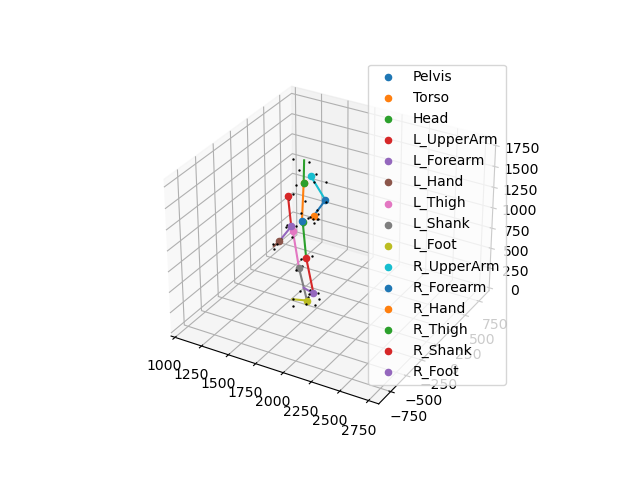

In [18]:
fig = plt.figure()
ax  = fig.add_subplot(111, projection="3d")
for segment in SegmentCoordinateSystem.keys():
    origin   = SegmentOrigin[segment][:,instant]
    if segment == 'Head':
        endpoint = origin + SegmentLength[segment]*SegmentCoordinateSystem[segment][1][:,instant]
    elif segment.endswith('Foot'):
        endpoint = origin + SegmentLength[segment]*SegmentCoordinateSystem[segment][0][:,instant]  
    else:
        endpoint = origin - SegmentLength[segment]*SegmentCoordinateSystem[segment][1][:,instant] 
    ax.scatter(origin[0],origin[1],origin[2], label = segment)
    ax.plot([origin[0],endpoint[0]],[origin[1],endpoint[1]],[origin[2],endpoint[2]]) 
for marker in Labels:
    position = Position[marker][:,instant]
    ax.scatter(position[0],position[1],position[2], color = 'k', s=0.5)
ax.legend()    
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_zlim(zlim)
plt.show()

In [19]:
NrOfSamples = numpy.shape(Position[Labels[0]])[1]
CoM  = numpy.zeros((3,NrOfSamples))
Mass = 0
Segment_CoM = {}

for segment in SegmentCoordinateSystem.keys():
    if segment.startswith('L') or segment.startswith('R'):
        segment_mass = Mass_fraction[segment[2:]][sex]
        com_scaling  = Length_percent[segment[2:]][sex]
    else:    
        segment_mass = Mass_fraction[segment][sex]
        com_scaling  = Length_percent[segment][sex]
    (X,Y,Z) = SegmentCoordinateSystem[segment]
    Segment_CoM[segment] = SegmentOrigin[segment]+SegmentLength[segment]/100*(X*com_scaling[0]+Y*com_scaling[1]+Z*com_scaling[2])
    Mass += segment_mass
    CoM  += segment_mass*Segment_CoM[segment]
CoM = CoM/Mass

In [20]:
print(Mass)

1.0020000000000002


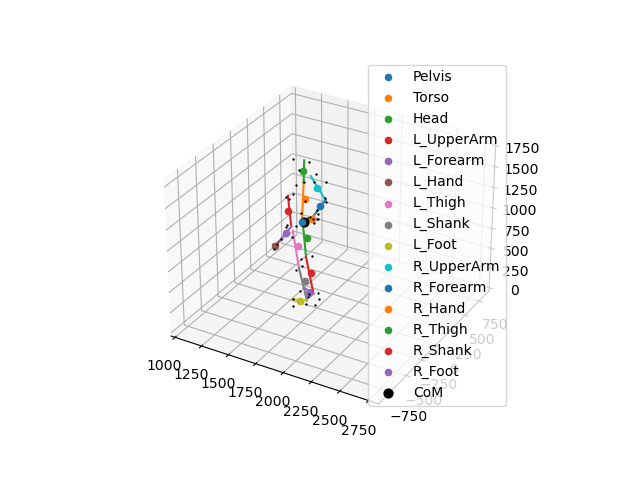

In [21]:
fig = plt.figure()
ax  = fig.add_subplot(111, projection="3d")
for segment in SegmentCoordinateSystem.keys():
    origin   = SegmentOrigin[segment][:,instant]
    if segment == 'Head':
        endpoint = origin + SegmentLength[segment]*SegmentCoordinateSystem[segment][1][:,instant]
    elif segment.endswith('Foot'):
        endpoint = origin + SegmentLength[segment]*SegmentCoordinateSystem[segment][0][:,instant]  
    else:
        endpoint = origin - SegmentLength[segment]*SegmentCoordinateSystem[segment][1][:,instant] 
    ax.plot([origin[0],endpoint[0]],[origin[1],endpoint[1]],[origin[2],endpoint[2]]) 
    segment_CoM = Segment_CoM[segment][:,instant]  
    ax.scatter(segment_CoM[0],segment_CoM[1],segment_CoM[2], label = segment)
com = CoM[:,instant]   
ax.scatter(com[0],com[1],com[2], color = 'k', s=40, label = 'CoM')
for marker in Labels:
    position = Position[marker][:,instant]
    ax.scatter(position[0],position[1],position[2], color = 'k', s=0.5)
ax.legend()
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_zlim(zlim)
plt.show()